<a href="https://colab.research.google.com/github/declan-healy/ferromagnetism-magnetismand-magnetic-circuits/blob/main/Experiment_E4_Ferromagnetism%2C_magnetism_and_magnetic_circuits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
!git clone "https://github.com/declan-healy/ferromagnetism-magnetismand-magnetic-circuits.git"
%cd /content/ferromagnetism-magnetismand-magnetic-circuits/
!git pull "https://github.com/declan-healy/ferromagnetism-magnetismand-magnetic-circuits.git"

fatal: destination path 'ferromagnetism-magnetismand-magnetic-circuits' already exists and is not an empty directory.
/content/ferromagnetism-magnetismand-magnetic-circuits
remote: Enumerating objects: 5, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 3 (delta 2), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (3/3), done.
From https://github.com/declan-healy/ferromagnetism-magnetismand-magnetic-circuits
 * branch            HEAD       -> FETCH_HEAD
Updating 84e3a55..2af90be
Fast-forward
 week6.txt | 12 ++++++------
 1 file changed, 6 insertions(+), 6 deletions(-)


In [34]:
! pip install -q uncertainties

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
import scipy.integrate as integrate
import os
import uncertainties as uc
import uncertainties.umath as um 

In [36]:
files = os.listdir()
n = 1
for i in files:
  globals()['file%s' % n] = pd.read_csv("First run.txt",  encoding = "ISO-8859-1", delimiter = "\t", skiprows = 4)
  n = n+1

In [37]:
print(files[0])
foil_3_3 = file1
print(files[1])
foil_3_error_2 = file2
print(files[2])


Error run.txt
aluminium sheets 4 error run 1.txt
ALUMMINIUM - week 2.txt


In [38]:
df = pd.read_csv("First run.txt",  encoding = "ISO-8859-1", delimiter = "\t", skiprows = 4)
df1 = pd.read_csv("week6.txt",  encoding = "ISO-8859-1", delimiter = "\t", skiprows = 0)

In [39]:
df1

,sheetno,thickness,run1,run2,run3,mean_unrounded,stdev_unrounded,mean,stdev
0,0,0.00,0.344,0.347,0.343,0.344667,0.002082,0.3447,0.0021
1,1,0.63,0.338,0.335,0.340,0.337667,0.002517,0.3377,0.0025
2,2,1.26,0.323,0.320,0.324,0.322333,0.002082,0.3223,0.0021
3,3,1.89,0.308,0.310,0.318,0.312000,0.005292,0.3120,0.0050
4,4,2.52,0.300,0.295,0.294,0.296333,0.003215,0.2960,0.0030


In [42]:
x = df.iloc[:,2]
y = df.iloc[:,4]

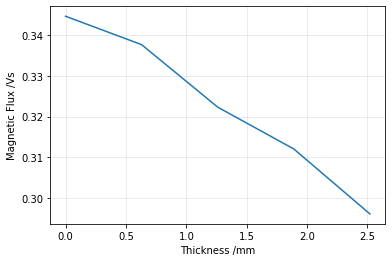

In [43]:
plt.plot(df1['thickness'],df1['mean'])
plt.xlabel('Thickness /mm')
plt.ylabel('Magnetic Flux /Vs')
plt.grid(alpha=0.3)

In [ ]:
plt.plot(x,y)
plt.xlabel('Current /A')
plt.ylabel('Magnetic Flux /Vs')
plt.grid(alpha=0.3)

In [ ]:
print(integrate.trapz(y[y>0]))
print(integrate.trapz(y[y<0]))
print(integrate.trapz(y[y>0])-integrate.trapz(y[y<0]))
#print(integrate.trapz(y))
#print(x.idxmax())
#print(y.idxmax())
#print(x.iloc[241])
y1 = y.iloc[x.idxmax():len(y)-1]
x1 = x.iloc[x.idxmax():len(y)-1]
#plt.plot(x1,y1)
print(integrate.trapz(y1[y1>0])-integrate.trapz(y1[y1<0]))
y2 = y1[0:y1.idxmin()]
x2 = x1.iloc[0:y1.idxmin()]
#plt.plot(x2,y2)

dat = []
for i in range(1,len(x1)):
  dat.append(x1.iloc[i]-x1.iloc[i-1])

print(dat)
plt.plot(range(1,len(x1)), dat)
